## ProtFam-EL
### Exploratory Data Analysis of Bioinformatics Protein Dataset

**Objectives:**
- Load and validate protein dataset
- Analyze protein family distributions
- Explore feature characteristics
- Identify correlations and patterns
- Generate insights for model development

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


### 1. Data Loading and Initial Inspection

In [3]:
# Load the dataset
data_path = '../data/raw/proteinas_20000_enriquecido.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nFirst few rows:")
df.head()

Dataset shape: (60000, 10)
Number of samples: 60000
Number of features: 10

First few rows:


,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,P00001,YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...,24667.4032,5.655161,0.105263,4,0.210526,0.349282,209,Receptora
1,P00002,CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...,21284.0710,5.892805,0.150838,3,0.189944,0.418994,179,Estrutural
2,P00003,QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...,17255.9747,7.228237,0.171141,9,0.181208,0.422819,149,Enzima
3,P00004,HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...,11792.1909,8.434802,0.173469,7,0.275510,0.408163,98,Transporte
4,P00005,NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...,22641.7108,7.080968,0.162234,5,0.202128,0.430851,188,Outras


In [4]:
# Dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Proteína            60000 non-null  object 
 1   Sequência              60000 non-null  object 
 2   Massa_Molecular        60000 non-null  float64
 3   Ponto_Isoelétrico      60000 non-null  float64
 4   Hidrofobicidade        60000 non-null  float64
 5   Carga_Total            60000 non-null  int64  
 6   Proporção_Polar        60000 non-null  float64
 7   Proporção_Apolar       60000 non-null  float64
 8   Comprimento_Sequência  60000 non-null  int64  
 9   Classe                 60000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
}).sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")


Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

Total missing values: 0


### 2. Target Variable Analysis (Protein Families)

In [6]:
# Identify target column (typically named 'family', 'class', 'target', or similar)
target_col = None
possible_targets = ['family', 'class', 'target', 'label', 'protein_family', 'Family', 'Class','Classe']

for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col:
    print(f"Target variable identified: {target_col}")
    print(f"\nUnique protein families: {df[target_col].nunique()}")
    print(f"\nProtein family distribution:\n")
    print(df[target_col].value_counts())
else:
    print("Target column not automatically identified. Please specify.")
    print(f"Available columns: {df.columns.tolist()}")

Target variable identified: Classe

Unique protein families: 5

Protein family distribution:

Classe
Outras        12216
Estrutural    11991
Transporte    11989
Enzima        11954
Receptora     11850
Name: count, dtype: int64


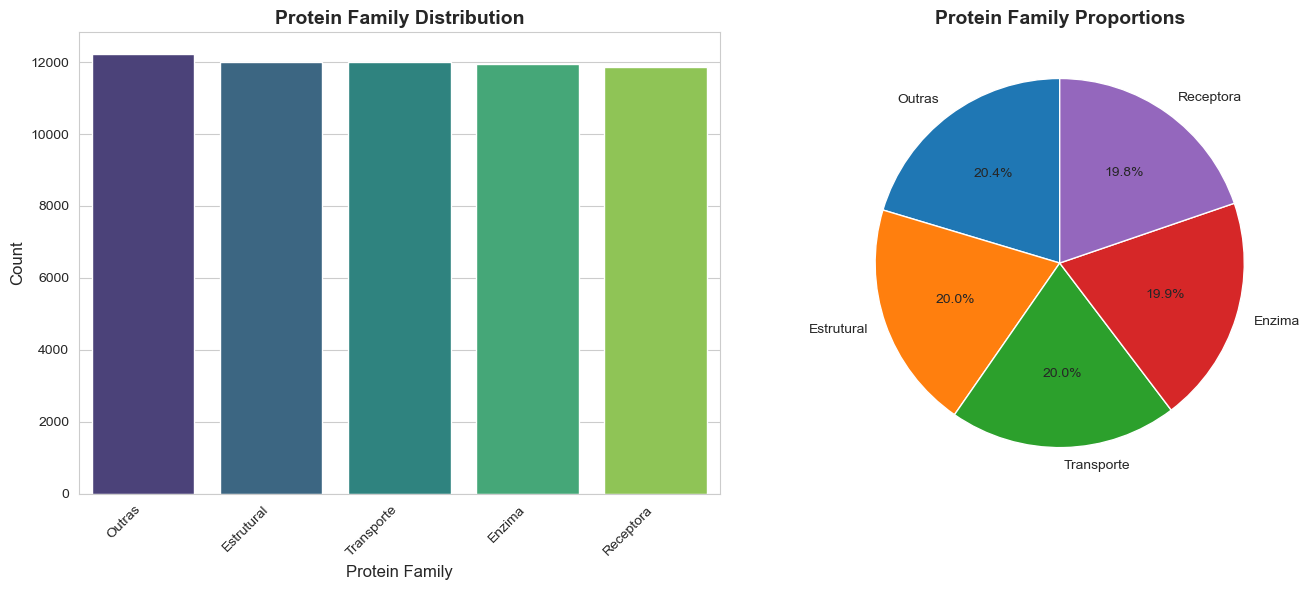


Class Imbalance Analysis:
Most common family: Outras (12216 samples)
Least common family: Receptora (11850 samples)
Imbalance ratio: 1.03


In [7]:
# Visualize protein family distribution
if target_col:
    plt.figure(figsize=(14, 6))
    
    # Count plot
    plt.subplot(1, 2, 1)
    family_counts = df[target_col].value_counts()
    sns.barplot(x=family_counts.index, y=family_counts.values, palette='viridis')
    plt.title('Protein Family Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Protein Family', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Protein Family Proportions', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../reports/figures/protein_family_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Check for class imbalance
    print("\nClass Imbalance Analysis:")
    print(f"Most common family: {family_counts.index[0]} ({family_counts.values[0]} samples)")
    print(f"Least common family: {family_counts.index[-1]} ({family_counts.values[-1]} samples)")
    print(f"Imbalance ratio: {family_counts.values[0] / family_counts.values[-1]:.2f}")

### 3. Feature Analysis

In [8]:
# Separate features and target
if target_col:
    feature_cols = [col for col in df.columns if col != target_col]
    X = df[feature_cols]
    y = df[target_col]
    
    print(f"Number of features: {len(feature_cols)}")
    print(f"\nFeature names (first 20):")
    print(feature_cols[:20])

Number of features: 9

Feature names (first 20):
['ID_Proteína', 'Sequência', 'Massa_Molecular', 'Ponto_Isoelétrico', 'Hidrofobicidade', 'Carga_Total', 'Proporção_Polar', 'Proporção_Apolar', 'Comprimento_Sequência']


In [9]:
# Statistical summary of features
print("Feature Statistics:")
X.describe()

Feature Statistics:


,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,20798.002743,7.259727,0.149968,8.727517,0.199930,0.400025,174.775683
std,8611.766490,1.447584,0.027094,7.503895,0.033709,0.041577,72.330865
min,5407.315100,4.050028,0.000000,-18.000000,0.018182,0.173077,50.000000
25%,13353.876800,6.051557,0.133136,3.000000,0.178571,0.373984,112.000000
50%,20784.058050,7.155000,0.150000,8.000000,0.199301,0.400000,175.000000
75%,28221.612275,8.585916,0.166667,13.000000,0.220859,0.425743,237.000000
max,37097.077600,11.785610,0.289474,52.000000,0.400000,0.640000,300.000000


In [10]:
# Select only numeric columns
numeric_X = X.select_dtypes(include='number')
# Check for zero-variance features
zero_var_features = numeric_X.columns[numeric_X.var() == 0].tolist()
print(f"\nZero-variance features: {len(zero_var_features)}")
if zero_var_features:
    print(zero_var_features)



Zero-variance features: 0


In [11]:
import matplotlib
matplotlib.use("Agg")  # Fast non-interactive backend
import matplotlib.pyplot as plt
import os

# Select only numeric columns
numeric_X = X.select_dtypes(include='number')

# Create output folder if it doesn't exist
output_folder = "../reports/figures"
os.makedirs(output_folder, exist_ok=True)

# Plot each numeric column separately
for col in numeric_X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(numeric_X[col].values, bins=30, alpha=0.7, edgecolor='black')
    plt.title(col, fontsize=10)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    # Save the figure
    safe_col_name = str(col).replace(" ", "_")  # make filename safe
    plt.savefig(f"{output_folder}/{safe_col_name}_distribution.png", dpi=120)
    
    # Close figure to free memory
    plt.close()


### 4. Correlation Analysis

In [12]:
import matplotlib
matplotlib.use("Agg")  # Fast non-interactive backend
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Select only numeric columns
numeric_X = X.select_dtypes(include='number')
feature_cols = numeric_X.columns

# Take a sample if too many features
if len(feature_cols) > 50:
    sample_features = feature_cols[:50]
    corr_matrix = numeric_X[sample_features].corr()
    print(f"Showing correlation for first 50 features (out of {len(feature_cols)})")
else:
    corr_matrix = numeric_X.corr()

# Ensure output folder exists
output_folder = "../reports/figures"
os.makedirs(output_folder, exist_ok=True)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')

# Save figure with moderate DPI for speed
plt.savefig(f"{output_folder}/correlation_heatmap.png", dpi=300)
plt.close()  # Close figure to free memory


In [13]:
import pandas as pd
import numpy as np

# Parameters
high_corr_threshold = 0.95

# Only numeric columns
numeric_X = X.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix_full = numeric_X.corr()

# Get upper triangle of correlation matrix (to avoid duplicates)
upper_tri = corr_matrix_full.where(np.triu(np.ones(corr_matrix_full.shape), k=1).astype(bool))

# Find highly correlated pairs
high_corr_pairs = upper_tri.stack().reset_index()
high_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Filter pairs above threshold
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > high_corr_threshold]

# Print results
if not high_corr_pairs.empty:
    print(f"\nHighly correlated feature pairs (|r| > {high_corr_threshold}):")
    print(high_corr_pairs.sort_values('Correlation', ascending=False).reset_index(drop=True))
else:
    print(f"\nNo feature pairs with correlation > {high_corr_threshold}")



Highly correlated feature pairs (|r| > 0.95):
         Feature 1              Feature 2  Correlation
0  Massa_Molecular  Comprimento_Sequência      0.99894


### 5. Feature Distribution by Protein Family

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
axes = axes.ravel()

for idx, col in enumerate(feature_cols[:10]):
    axes[idx].hist(X[col], bins=30, alpha=0.7)
    axes[idx].set_title(col, fontsize=9)

plt.tight_layout()
plt.savefig('../reports/figures/feature_distributions.png', dpi=150)
plt.show()

### 6. Outlier Detection

In [15]:
# Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

outlier_counts = {}
for col in feature_cols[:20]:  # Check first 20 features
    outlier_counts[col] = detect_outliers_iqr(df, col)

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
outlier_df = outlier_df.sort_values('Outlier_Count', ascending=False)

print("\nOutlier Analysis (first 20 features):")
print(outlier_df.head(10))


Outlier Analysis (first 20 features):
                       Outlier_Count
Hidrofobicidade                 1244
Proporção_Apolar                1216
Proporção_Polar                 1151
Carga_Total                      643
Massa_Molecular                    0
Ponto_Isoelétrico                  0
Comprimento_Sequência              0


### 7. Data Quality Report

In [16]:
# Generate comprehensive data quality report
print("="*60)
print("DATA QUALITY REPORT")
print("="*60)
print(f"\n1. DATASET OVERVIEW")
print(f"   Total Samples: {df.shape[0]:,}")
print(f"   Total Features: {len(feature_cols)}")
print(f"   Target Classes: {df[target_col].nunique() if target_col else 'N/A'}")

print(f"\n2. DATA QUALITY")
print(f"   Missing Values: {df.isnull().sum().sum()}")
print(f"   Duplicate Rows: {df.duplicated().sum()}")
print(f"   Zero-Variance Features: {len(zero_var_features)}")

print(f"\n3. CLASS DISTRIBUTION")
if target_col:
    for family, count in df[target_col].value_counts().items():
        percentage = (count / len(df)) * 100
        print(f"   {family}: {count} ({percentage:.1f}%)")

print(f"\n4. FEATURE CHARACTERISTICS")
print(f"   Numeric Features: {len(feature_cols)}")
print(f"   Highly Correlated Pairs (>0.95): {len(high_corr_pairs)}")

print(f"\n5. RECOMMENDATIONS")
if df.isnull().sum().sum() > 0:
    print("   - Handle missing values before modeling")
if len(zero_var_features) > 0:
    print("   - Remove zero-variance features")
if len(high_corr_pairs) > 0:
    print("   - Consider removing highly correlated features")
print("   - Apply feature scaling/normalization")
if target_col and df[target_col].nunique() > 2:
    imbalance = family_counts.values[0] / family_counts.values[-1]
    if imbalance > 3:
        print("   - Address class imbalance (consider SMOTE or class weights)")

print("\n" + "="*60)

DATA QUALITY REPORT

1. DATASET OVERVIEW
   Total Samples: 60,000
   Total Features: 7
   Target Classes: 5

2. DATA QUALITY
   Missing Values: 0
   Duplicate Rows: 0
   Zero-Variance Features: 0

3. CLASS DISTRIBUTION
   Outras: 12216 (20.4%)
   Estrutural: 11991 (20.0%)
   Transporte: 11989 (20.0%)
   Enzima: 11954 (19.9%)
   Receptora: 11850 (19.8%)

4. FEATURE CHARACTERISTICS
   Numeric Features: 7
   Highly Correlated Pairs (>0.95): 1

5. RECOMMENDATIONS
   - Consider removing highly correlated features
   - Apply feature scaling/normalization



### 8. Save Processed Data

In [ ]:
# Save clean dataset
df.to_csv('../data/processed/protein_data_clean.csv', index=False)
print("Clean dataset saved to: data/processed/protein_data_clean.csv")

# Save feature names for later use
with open('../data/processed/feature_names.txt', 'w') as f:
    for feature in feature_cols:
        f.write(f"{feature}\n")
print("Feature names saved to: data/processed/feature_names.txt")